
TFG

Este es el codigo del tfg de Borja Jimeno

In [17]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
import re




plt.rcParams['font.size'] = 18

In [18]:
import uproot
file = uproot.open("results3.root")
file.keys()

['gA112_6y_90_1.000000_2.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_2.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_2.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_1.000000_3.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_3.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_3.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_1.000000_4.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_4.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_4.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_1.000000_5.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_5.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_5.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_1.000000_6.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_6.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_6.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_2.000000_3.000000_QFtamara_SI;1',
 'gA112_6y_90_2.000000_3.000000_QFtamara_SDproton;1',
 'gA112_6y_90_2.000000_3.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_2.000000_4.000000_QFtamara_SI;1',
 'gA112_6y

# Creamos las funciones para trabajar con cadenas que nos serviran para leer los datos

In [19]:
def encuentra_intervalo(cadena):
    valores = re.findall(r"\d+\.\d+", cadena)
    a=np.zeros(2)
    a[0]=float(valores[0])
    a[1]=float(valores[1])
    return a

def lista_intervalo_fijo(einf,esup,window,step,modes):

    list_names=[]

    prin1="gA112_6y_90_"
    prin2="_QFtamara_"

    list_modes=["SDproton","SDneutron","SI"]

    i=einf
    while i<esup:
        j=i+window
        if j<=esup:
            for k in modes:
                list_names.append(prin1+f'{float(i):.6f}'+"_"+f'{float(j):.6f}'+prin2+list_modes[k])
        i=i+step
    return(list_names)

def lista_intervalo_movil(einf,esup,window,step,modes):
    list_names=[]

    prin1="gA112_6y_90_"
    prin2="_QFtamara_"

    list_modes=["SDproton","SDneutron","SI"]

    i=einf
    while i<esup:
        j=i+window
        while j<=esup:
            for k in modes:
                list_names.append(prin1+f'{float(i):.6f}'+"_"+f'{float(j):.6f}'+prin2+list_modes[k])
            j=j+step
        i=i+step
    return(list_names)

def carga_datos_hist(lista):
    
    file1 = uproot.open("results_0.5.root")
    file2 = uproot.open("results3.root")
    
    longitud=144
    datos=[]
    intervalos=[]
    resultado=[]

    for nombre in lista:

        valores=encuentra_intervalo(nombre)
        
        if(valores[0]%1!=0 or valores[1]%1!=0):
            graph = file1[nombre]
        else:
            graph = file2[nombre]
        aux=np.zeros((2,longitud))
        aux[0]=graph.member("fX")
        aux[1]=graph.member("fY")
        datos.append(aux)
        intervalos.append(valores)
    
        
        
        #np.savetxt("Exposicion_exp.csv",datos)  
    resultado.append(datos)
    resultado.append(intervalos)
    return resultado



def lista_intervalo_fijo_ALE(einf,esup,window,step,modes):

    list_names=[]

    prin1="gA112_6y_90_"
    prin2="_QFtamara_ANOD_"

    list_modes=["SDproton","SDneutron","SI"]

    i=einf
    while i<esup:
        j=i+window
        if j<=esup:
            for k in modes:
                list_names.append(prin1+f'{float(i):.6f}'+"_"+f'{float(j):.6f}'+prin2+list_modes[k])
        i=i+step
    return(list_names)

def lista_intervalo_movil_ALE(einf,esup,window,step,modes):
    list_names=[]

    prin1="gA112_6y_90_"
    prin2="_QFtamara_ANOD_"

    list_modes=["SDproton","SDneutron","SI"]

    i=einf
    while i<esup:
        j=i+window
        while j<=esup:
            for k in modes:
                list_names.append(prin1+f'{float(i):.6f}'+"_"+f'{float(j):.6f}'+prin2+list_modes[k])
            j=j+step
        i=i+step
    return(list_names)

def carga_datos_hist_ALE(lista):
    
    file1 = uproot.open("results_anod.root")
    
    longitud=144
    datos=[]
    intervalos=[]
    resultado=[]

    for nombre in lista:

        valores=encuentra_intervalo(nombre)
        graph = file1[nombre]

        aux=np.zeros((2,longitud))

        aux[0]=graph.member("fX")
        aux[1]=graph.member("fY")

        datos.append(aux)
        intervalos.append(valores)
    
        
        
        #np.savetxt("Exposicion_exp.csv",datos)  
    resultado.append(datos)
    resultado.append(intervalos)
    return resultado


def minimiza_lista_datos(lista_datos):
    
    longitud=144
    masas=np.zeros(longitud)
    sigmas=np.zeros(longitud)
    intervalo_minimo=np.zeros((2,longitud))

    for i in range (len(masas)):
        masas[i]=lista_datos[0][0][0][i]

    for i in range (len(masas)):
        sigma_aux=1
        for j in range (len(lista_datos[0])):
            a=0
            for k in range (len(masas)):
                if(lista_datos[0][j][1][k]<1.e-60):
                    a=1
            if (a==0):
                if(lista_datos[0][j][1][i]<sigma_aux):
                    if(lista_datos[0][j][1][i]>1.e-50):
                        sigma_aux=lista_datos[0][j][1][i]
                        intervalo_minimo[0,i]=lista_datos[1][j][0]
                        intervalo_minimo[1,i]=lista_datos[1][j][1]
        sigmas[i]=sigma_aux

    return masas,sigmas,intervalo_minimo


# SI Intervalo fijo de 1 keV

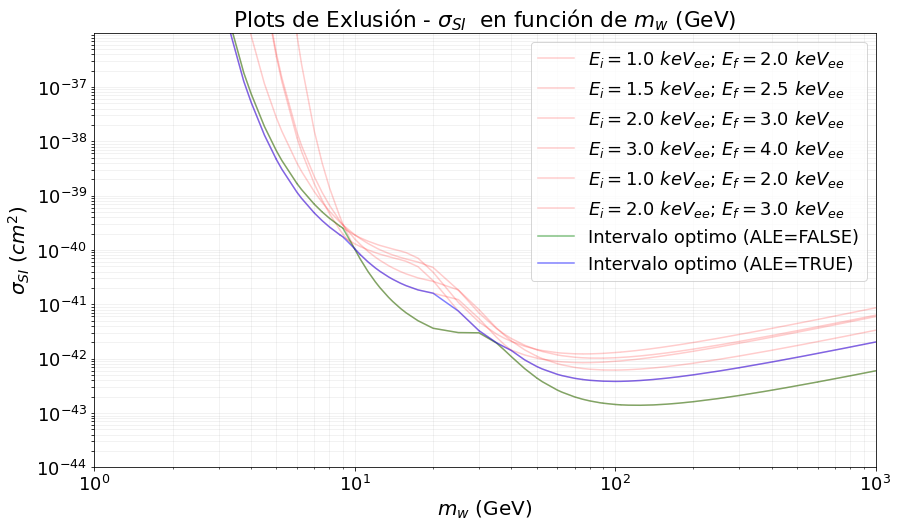

In [20]:
einf=1.0
esup=6.0
window=1.0
step=0.5
modes=[2]

lista_datos=carga_datos_hist(lista_intervalo_fijo(einf,esup,window,step,modes))
masas,sigmas,intervalo_minimo=minimiza_lista_datos(lista_datos)
idx = np.argsort(masas)
masas= masas[idx]
sigmas = sigmas[idx]

lista_datos_ALE=carga_datos_hist_ALE(lista_intervalo_fijo_ALE(einf,esup,window,step,modes))
masas_ALE,sigmas_ALE,intervalo_minimo_ALE=minimiza_lista_datos(lista_datos_ALE)
idx = np.argsort(masas_ALE)
masas_ALE= masas_ALE[idx]
sigmas_ALE = sigmas_ALE[idx]

plt.figure(figsize=(14, 8))
ax = plt.subplot()

for j in range (len(lista_datos[0])):
    a=0
    for i in range (len(masas)):
        if(lista_datos[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos[1][j][0])
        Ef = float(lista_datos[1][j][1])
        idx = np.argsort(lista_datos[0][j][0])
        m= lista_datos[0][j][0][idx]
        s = lista_datos[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.2,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

for j in range (len(lista_datos_ALE[0])):
    a=0
    for i in range (len(masas_ALE)):
        if(lista_datos_ALE[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos_ALE[1][j][0])
        Ef = float(lista_datos_ALE[1][j][1])
        idx = np.argsort(lista_datos_ALE[0][j][0])
        m= lista_datos_ALE[0][j][0][idx]
        s = lista_datos_ALE[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.2,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

ax.plot(masas,sigmas,label="Intervalo optimo (ALE=FALSE)",alpha=0.5,c='green', antialiased=True,
    solid_joinstyle='round')

ax.plot(masas_ALE,sigmas_ALE,label="Intervalo optimo (ALE=TRUE)",alpha=0.5,c='blue', antialiased=True,
    solid_joinstyle='round')

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-44

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

sigma_fijo_1kev=sigmas

sigma_fijo_1kev_ALE=sigmas_ALE


# SI Intervalo fijo de 2 keV

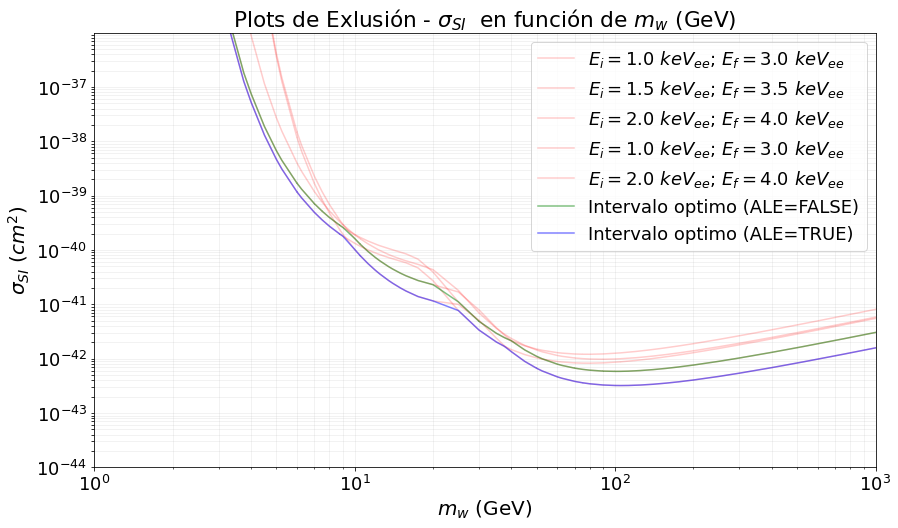

In [21]:
einf=1.0
esup=6.0
window=2.0
step=0.5
modes=[2]

lista_datos=carga_datos_hist(lista_intervalo_fijo(einf,esup,window,step,modes))
masas,sigmas,intervalo_minimo=minimiza_lista_datos(lista_datos)
idx = np.argsort(masas)
masas= masas[idx]
sigmas = sigmas[idx]

lista_datos_ALE=carga_datos_hist_ALE(lista_intervalo_fijo_ALE(einf,esup,window,step,modes))
masas_ALE,sigmas_ALE,intervalo_minimo_ALE=minimiza_lista_datos(lista_datos_ALE)
idx = np.argsort(masas_ALE)
masas_ALE= masas_ALE[idx]
sigmas_ALE = sigmas_ALE[idx]

plt.figure(figsize=(14, 8))
ax = plt.subplot()

for j in range (len(lista_datos[0])):
    a=0
    for i in range (len(masas)):
        if(lista_datos[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos[1][j][0])
        Ef = float(lista_datos[1][j][1])
        idx = np.argsort(lista_datos[0][j][0])
        m= lista_datos[0][j][0][idx]
        s = lista_datos[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.2,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

for j in range (len(lista_datos_ALE[0])):
    a=0
    for i in range (len(masas_ALE)):
        if(lista_datos_ALE[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos_ALE[1][j][0])
        Ef = float(lista_datos_ALE[1][j][1])
        idx = np.argsort(lista_datos_ALE[0][j][0])
        m= lista_datos_ALE[0][j][0][idx]
        s = lista_datos_ALE[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.2,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

ax.plot(masas,sigmas,label="Intervalo optimo (ALE=FALSE)",alpha=0.5,c='green', antialiased=True,
    solid_joinstyle='round')

ax.plot(masas_ALE,sigmas_ALE,label="Intervalo optimo (ALE=TRUE)",alpha=0.5,c='blue', antialiased=True,
    solid_joinstyle='round')

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-44

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

sigma_fijo_2kev=sigmas
sigma_fijo_2kev_ALE=sigmas_ALE

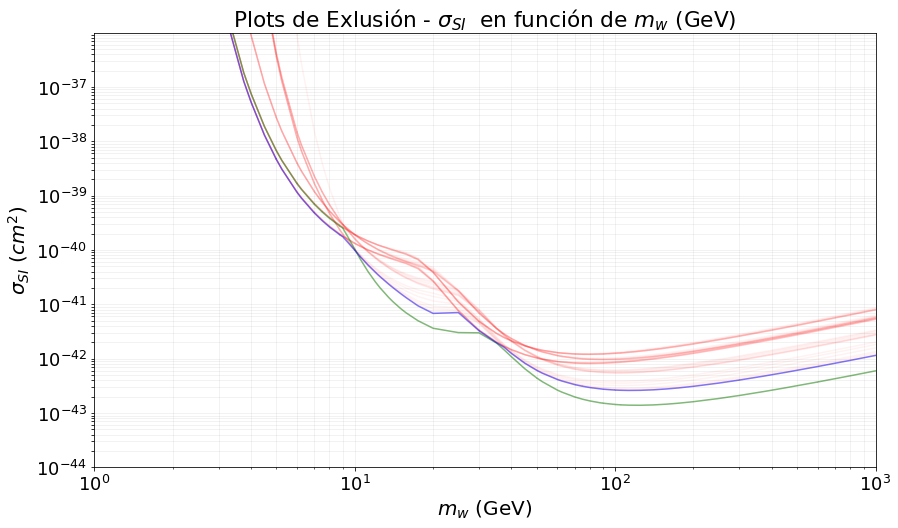

In [22]:
einf=1.0
esup=6.0
window=1.0
step=0.5
modes=[2]



lista_datos=carga_datos_hist(lista_intervalo_movil(einf,esup,window,step,modes))
masas,sigmas,intervalo_minimo=minimiza_lista_datos(lista_datos)
idx = np.argsort(masas)
masas= masas[idx]
sigmas = sigmas[idx]

lista_datos_ALE=carga_datos_hist_ALE(lista_intervalo_movil_ALE(einf,esup,window,step,modes))
masas_ALE,sigmas_ALE,intervalo_minimo_ALE=minimiza_lista_datos(lista_datos_ALE)
idx = np.argsort(masas_ALE)
masas_ALE= masas_ALE[idx]
sigmas_ALE = sigmas_ALE[idx]

plt.figure(figsize=(14, 8))
ax = plt.subplot()

for j in range (len(lista_datos[0])):
    a=0
    for i in range (len(masas)):
        if(lista_datos[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos[1][j][0])
        Ef = float(lista_datos[1][j][1])
        idx = np.argsort(lista_datos[0][j][0])
        m= lista_datos[0][j][0][idx]
        s = lista_datos[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.05,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

for j in range (len(lista_datos_ALE[0])):
    a=0
    for i in range (len(masas_ALE)):
        if(lista_datos_ALE[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos_ALE[1][j][0])
        Ef = float(lista_datos_ALE[1][j][1])
        idx = np.argsort(lista_datos_ALE[0][j][0])
        m= lista_datos_ALE[0][j][0][idx]
        s = lista_datos_ALE[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.05,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

ax.plot(masas,sigmas,label="Intervalo optimo (ALE=FALSE)",alpha=0.5,c='green', antialiased=True,
    solid_joinstyle='round')

ax.plot(masas_ALE,sigmas_ALE,label="Intervalo optimo (ALE=TRUE)",alpha=0.5,c='blue', antialiased=True,
    solid_joinstyle='round')


#ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-44

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

sigma_variable_1keV=sigmas
ancho_1kev=intervalo_minimo

sigma_variable_1keV_ALE=sigmas_ALE
ancho_1kev_ALE=intervalo_minimo_ALE


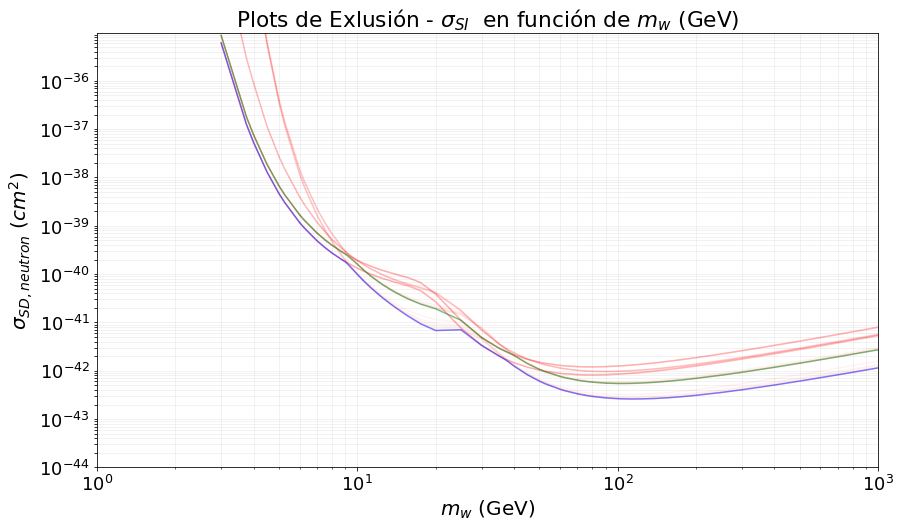

In [23]:
einf=1.0
esup=6.0
window=2.0
step=0.5
modes=[2]

lista_datos=carga_datos_hist(lista_intervalo_movil(einf,esup,window,step,modes))
masas,sigmas,intervalo_minimo=minimiza_lista_datos(lista_datos)
idx = np.argsort(masas)
masas= masas[idx]
sigmas = sigmas[idx]

lista_datos_ALE=carga_datos_hist_ALE(lista_intervalo_movil_ALE(einf,esup,window,step,modes))
masas_ALE,sigmas_ALE,intervalo_minimo_ALE=minimiza_lista_datos(lista_datos_ALE)
idx = np.argsort(masas_ALE)
masas_ALE= masas_ALE[idx]
sigmas_ALE = sigmas_ALE[idx]

plt.figure(figsize=(14, 8))
ax = plt.subplot()

for j in range (len(lista_datos[0])):
    a=0
    for i in range (len(masas)):
        if(lista_datos[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos[1][j][0])
        Ef = float(lista_datos[1][j][1])
        idx = np.argsort(lista_datos[0][j][0])
        m= lista_datos[0][j][0][idx]
        s = lista_datos[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.05,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

for j in range (len(lista_datos_ALE[0])):
    a=0
    for i in range (len(masas_ALE)):
        if(lista_datos_ALE[0][j][1][i]<1.e-60):
            a=1
    if (a==0):
        Ei = float(lista_datos_ALE[1][j][0])
        Ef = float(lista_datos_ALE[1][j][1])
        idx = np.argsort(lista_datos_ALE[0][j][0])
        m= lista_datos_ALE[0][j][0][idx]
        s = lista_datos_ALE[0][j][1][idx]
        ax.plot(m,s,c="red",alpha=0.05,label=("$E_i=$" + f"{Ei:.1f}" + " $keV_{ee}$; ""$E_f=$" + f"{Ef:.1f}" + " $keV_{ee}$"),antialiased=True,
        solid_joinstyle='round')

ax.plot(masas,sigmas,label="Intervalo optimo (ALE=FALSE)",alpha=0.5,c='green', antialiased=True,
    solid_joinstyle='round')

ax.plot(masas_ALE,sigmas_ALE,label="Intervalo optimo (ALE=TRUE)",alpha=0.5,c='blue', antialiased=True,
    solid_joinstyle='round')


#ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,neutron}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-35
y_inf=1e-44

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

sigma_variable_2keV=sigmas
ancho_2kev=intervalo_minimo

sigma_variable_2keV_ALE=sigmas_ALE
ancho_2kev_ALE=intervalo_minimo_ALE


Intervalo minimo 1 keV
Mass: 3.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 3.8 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 4.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 4.5 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 5.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 5.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 5.2 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 6.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 6.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 6.2 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 7.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 7.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 7.5 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 7.5 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 8.0 GeV - Minimum Exlussion Interval:  (1.0 - 2.0) keV 
Mass: 8.8 GeV - Minimum Exlussion Interval:  (3

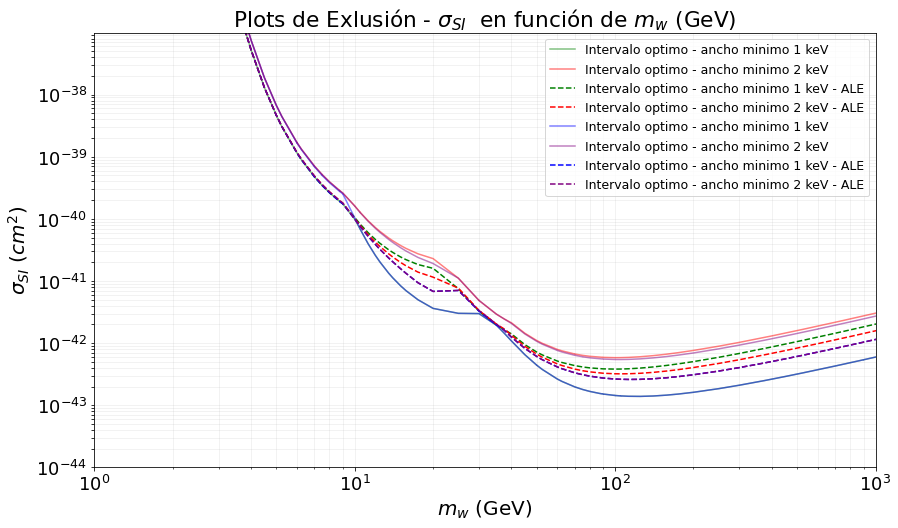

In [34]:
plt.figure(figsize=(14, 8))
ax = plt.subplot()

ax.plot(masas,sigma_fijo_1kev,c='green',alpha = 0.5,label="Intervalo optimo - ancho minimo 1 keV")
ax.plot(masas,sigma_fijo_2kev,c='red',alpha = 0.5,label="Intervalo optimo - ancho minimo 2 keV")


ax.plot(masas_ALE,sigma_fijo_1kev_ALE,linestyle='--',c='green',label="Intervalo optimo - ancho minimo 1 keV - ALE")
ax.plot(masas_ALE,sigma_fijo_2kev_ALE,linestyle='--',c='red',label="Intervalo optimo - ancho minimo 2 keV - ALE")

ax.plot(masas,sigma_variable_1keV,c='blue',alpha = 0.5,label="Intervalo optimo - ancho minimo 1 keV")
ax.plot(masas,sigma_variable_2keV,c='purple',alpha = 0.5,label="Intervalo optimo - ancho minimo 2 keV")


ax.plot(masas_ALE,sigma_variable_1keV_ALE,linestyle='--',c='blue',label="Intervalo optimo - ancho minimo 1 keV - ALE")
ax.plot(masas_ALE,sigma_variable_2keV_ALE,linestyle='--',c='purple',label="Intervalo optimo - ancho minimo 2 keV - ALE")


ax.legend(fontsize='x-small', markerscale=0.8, ncol=1)
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-37
y_inf=1e-44

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


print(f'Intervalo minimo 1 keV') 
for i in range (len(masas)):
    print(f'Mass: {masas[i]:.1f} GeV - Minimum Exlussion Interval:  ({ancho_1kev[0][i]} - {ancho_1kev[1][i]}) keV ')
print(f'Intervalo minimo 2 keV') 
for i in range (len(masas)):
    print(f'Mass: {masas[i]:.1f} GeV - Minimum Exlussion Interval:  ({ancho_2kev[0][i]} - {ancho_2kev[1][i]}) keV ')

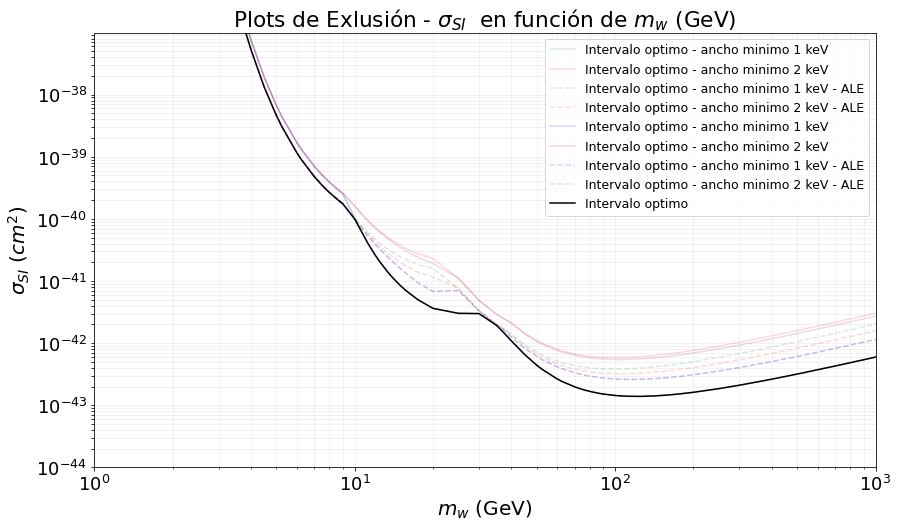

In [25]:
plt.figure(figsize=(14, 8))
ax = plt.subplot()

ax.plot(masas,sigma_fijo_1kev,c='green',alpha = 0.15,label="Intervalo optimo - ancho minimo 1 keV")
ax.plot(masas,sigma_fijo_2kev,c='red',alpha = 0.15,label="Intervalo optimo - ancho minimo 2 keV")


ax.plot(masas_ALE,sigma_fijo_1kev_ALE,linestyle='--',alpha = 0.15,c='green',label="Intervalo optimo - ancho minimo 1 keV - ALE")
ax.plot(masas_ALE,sigma_fijo_2kev_ALE,linestyle='--',alpha = 0.15,c='red',label="Intervalo optimo - ancho minimo 2 keV - ALE")

ax.plot(masas,sigma_variable_1keV,c='blue',alpha = 0.15,label="Intervalo optimo - ancho minimo 1 keV")
ax.plot(masas,sigma_variable_2keV,c='purple',alpha = 0.15,label="Intervalo optimo - ancho minimo 2 keV")


ax.plot(masas_ALE,sigma_variable_1keV_ALE,linestyle='--',alpha = 0.15,c='blue',label="Intervalo optimo - ancho minimo 1 keV - ALE")
ax.plot(masas_ALE,sigma_variable_2keV_ALE,linestyle='--',alpha = 0.15,c='purple',label="Intervalo optimo - ancho minimo 2 keV - ALE")

sigma_minimos=sigma_fijo_1kev

for i in range (len(sigma_minimos)):
    minimo=sigma_fijo_1kev[i]

    if (sigma_fijo_2kev[i]<minimo):
        minimo=sigma_fijo_2kev[i]

    if (sigma_fijo_1kev_ALE[i]<minimo):
        minimo=sigma_fijo_1kev_ALE[i]

    if (sigma_variable_1keV[i]<minimo):
        minimo=sigma_variable_1keV[i]

    if (sigma_variable_2keV[i]<minimo):
        minimo=sigma_variable_2keV[i]

    if (sigma_variable_1keV_ALE[i]<minimo):
        minimo=sigma_variable_1keV_ALE[i]

    if (sigma_variable_2keV_ALE[i]<minimo):
        minimo=sigma_variable_2keV_ALE[i]

    sigma_minimos[i]=minimo
    
ax.plot(masas_ALE,sigma_minimos,linestyle='-',c='black',label="Intervalo optimo")

ax.legend(fontsize='x-small', markerscale=0.8, ncol=1)
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-37
y_inf=1e-44

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


In [26]:
m=masas
s=sigma_minimos

fichero = open("SI_ANAIS_INT.txt", 'w')
# Guardamos la lista en el fichero
for i in range(len(m)):
    fichero.write(f"{m[i]} \t {s[i]} \n")

# Cerramos el fichero
fichero.close()